In [1]:
import shutil
import matplotlib.pyplot as plt
from osgeo import gdal, osr
import numpy as np
import xarray as xr
import cartopy


In [2]:
#localise le fichier à référencer et crée le fichier cible (en .tif)
orig_fn ="C:/Users/arman/OneDrive/Desktop/uni/Archeo/SIRS/Krm_secteurs.png"
output_fn = 'C:/Users/arman/OneDrive/Desktop/uni/Archeo/SIRS/Krm_sect.tif'
#donne des champs de coordonnées géographiques à orig-fn et les sauvegarde sous output-fn
gdal.Translate(output_fn, orig_fn)

# Create a copy of the original file and save it as the output filename:
#shutil.copy(orig_fn, output_fn)


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001E746D62570> >

In [3]:
# Open the output file for writing for writing:
ds = gdal.Open(output_fn, gdal.GA_Update)

# Set spatial reference:
sr = osr.SpatialReference()
sr.ImportFromEPSG(32631) #My projection system

# Enter the GCPs
#   Format: [map x-coordinate(longitude)], [map y-coordinate (latitude)], [elevation],
#   [image column index(x)], [image row index (y)]

gcps = [gdal.GCP(500, 1200, 0, 70, 21),
        gdal.GCP(0, 0, 0, 684, 1496),
        gdal.GCP(0, 1200, 0, 684, 21)]

#à essayer avec les points fournis par M. Honegger

# Apply the GCPs to the open output file:
ds.SetGCPs(gcps, sr.ExportToWkt())

# Close the output file in order to be able to work with it in other programs:
del ds

In [8]:
#ouvre l'image et l'affiche
da = xr.open_rasterio('C:/Users/arman/OneDrive/Desktop/uni/Archeo/SIRS/Krm_sect.tif')
transform = Affine.from_gdal(*da.attrs['transform']) # this is important to retain the geographic attributes from the file
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.imshow(da.variable.data[0])
plt.show()

NameError: name 'Affine' is not defined

In [7]:
dataset = gdal.Open('C:/Users/arman/OneDrive/Desktop/uni/Archeo/SIRS/Krm_sect.tif')

print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                            dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Driver: GTiff/GeoTIFF
Size is 1361 x 1913 x 3
Projection is PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]
Origin = (0.0, 0.0)
Pixel Size = (1.0, 1.0)


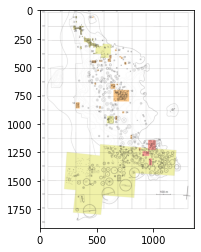

<AxesSubplot:>

In [9]:
import rasterio
from rasterio.plot import show
fp = r'C:/Users/arman/OneDrive/Desktop/uni/Archeo/SIRS/Krm_sect.tif'
img = rasterio.open(fp)
#show(img)
show(img)